# NAME: Priti Chauhan
BATCH NO: 1845
    

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


df=pd.read_csv('happiness_score.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [9]:
df.shape

(158, 12)

In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [69]:
ndf=df.drop(['Country','Region'],axis=1)
ndf

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [70]:
ndf.keys()

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

<AxesSubplot:>

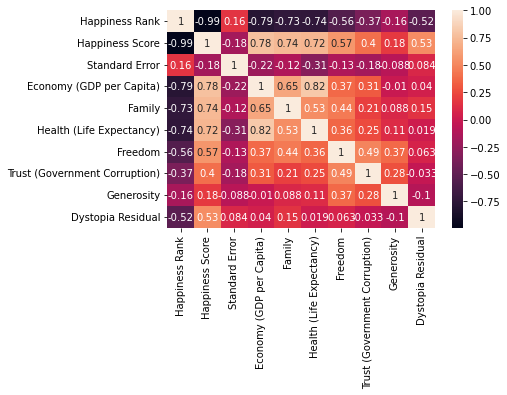

In [92]:
sns.heatmap(ndf.corr(),annot=True)

In [ ]:
The map shows that the Happiness Score correlates strongly with GDP per capita and Healthy Life Expectancy. It has a low correlation with Generosity and trust (Gov. Corruption). Also, the negative coefficient between Happiness rank and Happiness score shows that they have an inverse relationship; the lower the score, the higher the rank.

We can further use a scatter plot to view the relationship between Happiness Score and GDP per capita, the output shows that the richer countries are happier.

In [71]:
x=ndf.iloc[:,0:-1]

In [72]:
x

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [73]:
y=ndf.iloc[:,-1]

In [74]:
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
153    0.67042
154    1.63328
155    0.32858
156    1.83302
157    1.56726
Name: Dystopia Residual, Length: 158, dtype: float64

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [76]:
x_train.shape

(110, 9)

In [77]:
x_test.shape

(48, 9)

In [78]:
y_train.shape

(110,)

In [79]:
y_test.shape

(48,)

In [80]:
from sklearn.linear_model import LinearRegression

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(x_train,y_train)

LinearRegression()

In [84]:
lm.predict(x_test)

array([1.34734082, 2.51756921, 2.72262432, 0.89950727, 3.10730391,
       2.46525081, 1.92343723, 2.77689576, 1.26504106, 2.43856429,
       2.20795701, 0.98189901, 3.08890365, 1.59584052, 0.65460522,
       2.0511929 , 1.58825861, 1.99182271, 1.95843154, 2.75458581,
       1.41720352, 1.87663904, 1.95077589, 2.44213857, 2.24625531,
       2.09980857, 1.4617938 , 2.32065906, 1.79309827, 2.451951  ,
       2.12375331, 2.21124314, 2.2692522 , 1.75338056, 1.21363093,
       1.68163769, 1.69495408, 2.11561307, 2.20149356, 3.60191268,
       2.67622411, 1.9311938 , 2.67777484, 2.31981367, 1.88969413,
       2.23760212, 2.7022521 , 2.48660631])

In [85]:
lm.intercept_

-0.0015150623517814488

In [86]:
lm.coef_

array([ 4.90537677e-06,  1.00015304e+00,  1.19028409e-03, -9.99957930e-01,
       -1.00010878e+00, -9.99802478e-01, -9.99425013e-01, -1.00007321e+00,
       -9.99973890e-01])

In [87]:
ndf.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [88]:
lm.score(x_train,y_train)

0.9999997435823135

In [89]:
pred=lm.predict(x_test)
print("Predicted Happiness Score",pred)
print('Actual Happiness Score',y_test)

Predicted Happiness Score [1.34734082 2.51756921 2.72262432 0.89950727 3.10730391 2.46525081
 1.92343723 2.77689576 1.26504106 2.43856429 2.20795701 0.98189901
 3.08890365 1.59584052 0.65460522 2.0511929  1.58825861 1.99182271
 1.95843154 2.75458581 1.41720352 1.87663904 1.95077589 2.44213857
 2.24625531 2.09980857 1.4617938  2.32065906 1.79309827 2.451951
 2.12375331 2.21124314 2.2692522  1.75338056 1.21363093 1.68163769
 1.69495408 2.11561307 2.20149356 3.60191268 2.67622411 1.9311938
 2.67777484 2.31981367 1.88969413 2.23760212 2.7022521  2.48660631]
Actual Happiness Score 99     1.34759
0      2.51738
147    2.72230
133    0.89991
80     3.10709
3      2.46531
135    1.92313
115    2.77729
87     1.26462
34     2.43872
117    2.20857
144    0.98195
10     3.08854
129    1.59541
71     0.65429
125    2.05125
72     1.58782
149    1.99172
139    1.95812
61     2.75414
150    1.41723
38     1.87634
132    1.95071
114    2.44191
44     2.24639
82     2.10017
127    1.46181
64     2.320

In [90]:
print('error:')

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_absolute_error(y_test,pred))

print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.00025381160272175407
Mean squared error: 0.00025381160272175407
Root Mean squared error: 0.00029702498651389033


In [91]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999997439887501


Conclusion
Economy (GDP per Capita), freedom, and Health (Life Expectancy) are significant determinants of Happiness score and can be used to predict future scores. However, this is not conclusive because unforeseen occurrences like a pandemic, natural disasters, and economic meltdowns happen, even to the most stable countries, so these scores can change.

Family is also important because we see a reasonable correlation between Social status(also known as family) and Happiness score, so, hold your loved ones dear.